In [ ]:
pip install yfinance

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline 

In [3]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For reading stock data from yahoo
yf.pdr_override()

# For time stamps
from datetime import datetime

# Stock Market Analysis

In [ ]:
# The tech stocks we'll use for this analysis
stock_list = ['AMZN', 'JPM', 'COST', 'CALM']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AMZN, JPM, COST, CALM]
company_name = ["AMAZON", "JPMORGAN", "COSTCO", "CALMAINE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-02-24,100.158997,101.964996,99.398499,100.464500,100.464500,130940000,AMAZON
2020-02-25,101.320999,101.730003,97.920998,98.637001,98.637001,124382000,AMAZON
2020-02-26,98.514000,100.733498,98.022499,98.979500,98.979500,104492000,AMAZON
2020-02-27,96.719002,98.750000,94.138000,94.214996,94.214996,162880000,AMAZON
2020-02-28,90.731499,94.487999,90.556503,94.187500,94.187500,189620000,AMAZON


In [ ]:
# Summary Stats
JPM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,758.000000,758.000000,758.000000,758.000000,758.000000,7.580000e+02
mean,130.251834,131.733060,128.728734,130.220277,124.858051,1.522522e+07
std,24.298523,24.216821,24.362611,24.300827,24.296688,7.474780e+06
min,81.559998,83.750000,76.910004,79.029999,72.047020,1.466679e+06
25%,111.802500,113.389999,110.357498,111.895000,107.421583,1.044438e+07
50%,131.575005,132.879997,130.099998,131.495003,128.302361,1.315565e+07
75%,152.970001,154.432499,151.242500,152.905003,146.089741,1.731922e+07
max,172.710007,172.960007,170.539993,171.779999,165.302948,5.441880e+07


In [ ]:
# General info
JPM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2020-02-24 to 2023-02-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          758 non-null    float64
 1   High          758 non-null    float64
 2   Low           758 non-null    float64
 3   Close         758 non-null    float64
 4   Adj Close     758 non-null    float64
 5   Volume        758 non-null    int64  
 6   company_name  758 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.4+ KB


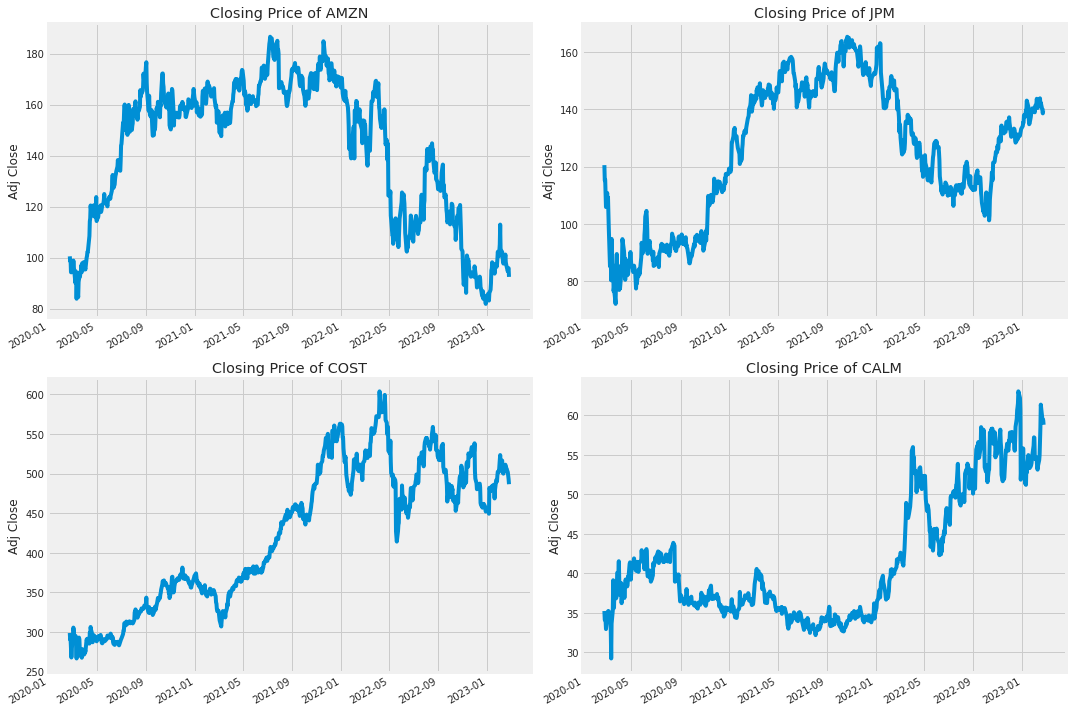

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")
    
plt.tight_layout()

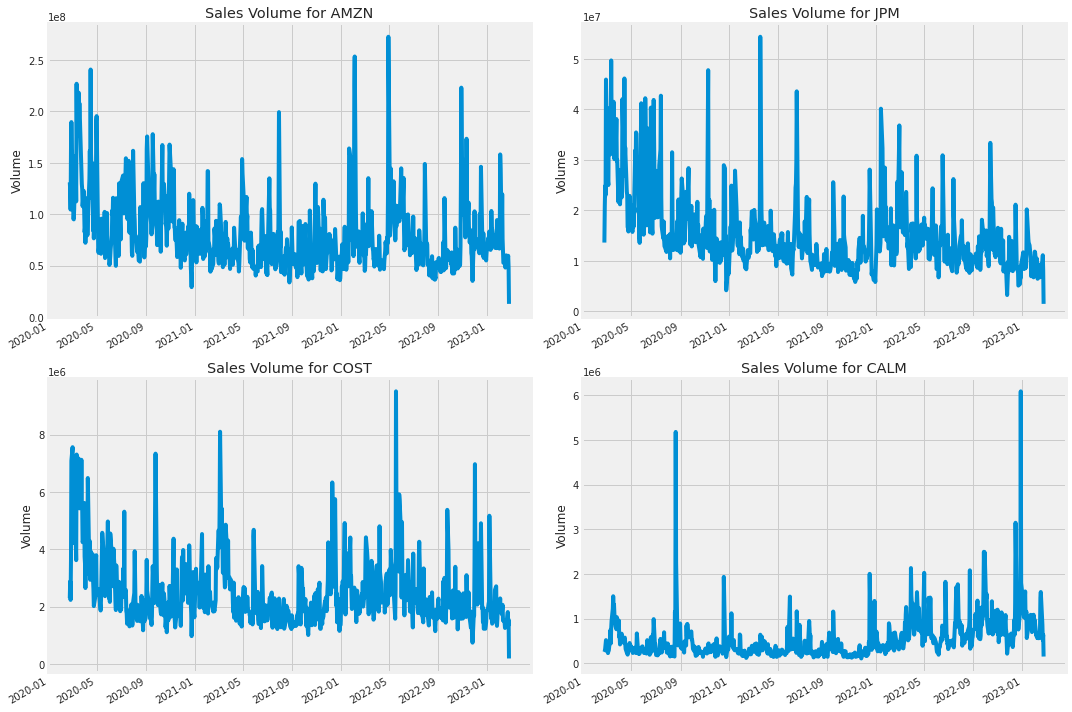

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")
    
plt.tight_layout()

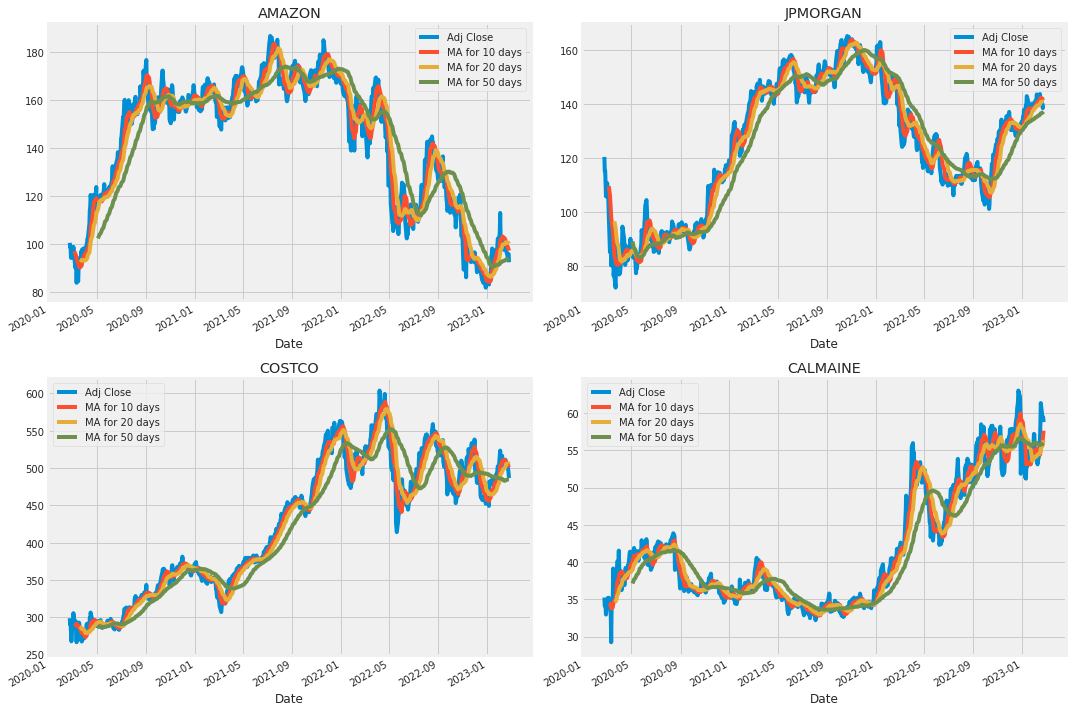

In [ ]:
# Moving Average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMAZON')

JPM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('JPMORGAN')

COST[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('COSTCO')

CALM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('CALMAINE')

fig.tight_layout()

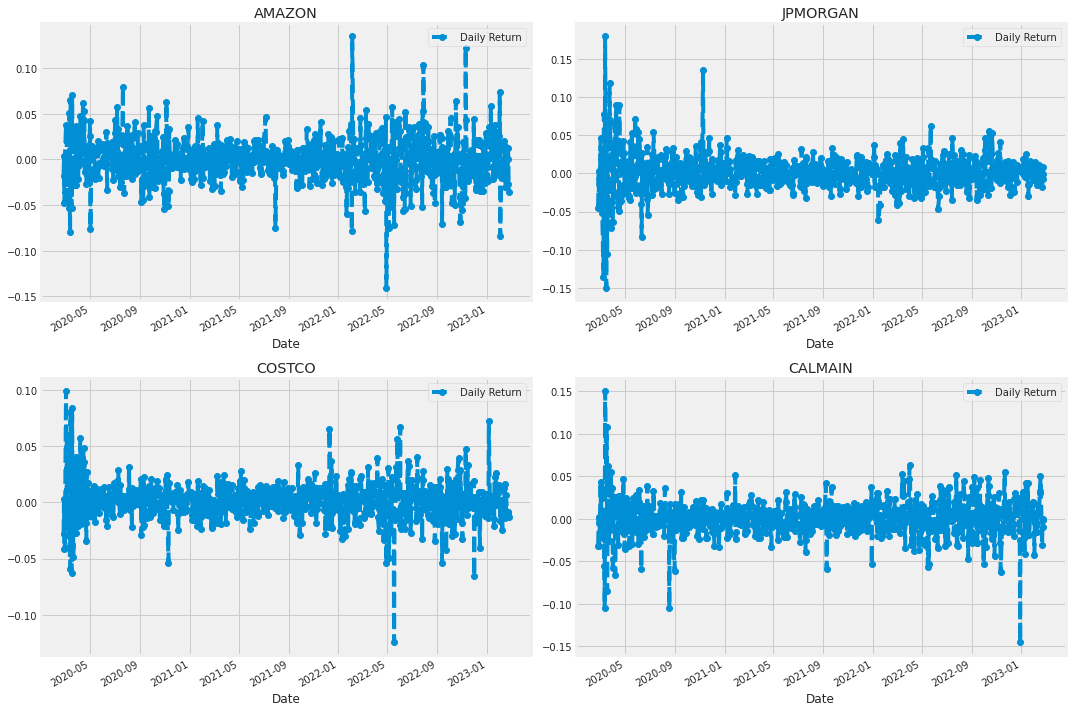

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AMZN['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AMAZON')

JPM['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('JPMORGAN')

COST['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('COSTCO')

CALM['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('CALMAIN')

fig.tight_layout()

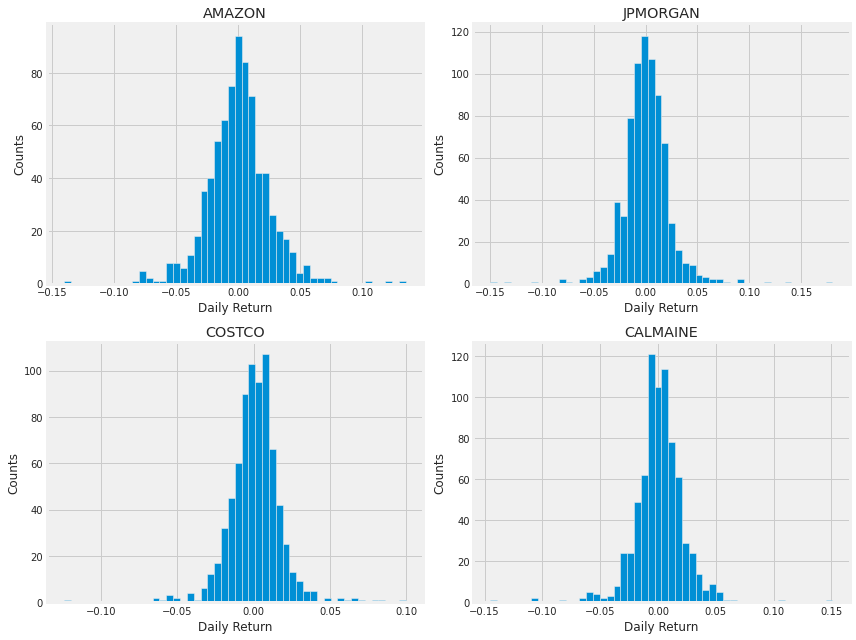

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
# correlation between different stocks closing prices
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
stock_rets = closing_df.pct_change()
stock_rets.head()

[*********************100%***********************]  4 of 4 completed


,AMZN,CALM,COST,JPM
Date,,,,
2020-02-24,NaN,NaN,NaN,NaN
2020-02-25,-0.018190,-0.031895,-0.027900,-0.044643
2020-02-26,0.003472,0.002215,0.002690,0.003009
2020-02-27,-0.048136,-0.004972,-0.041087,-0.041614
2020-02-28,-0.000292,-0.031372,-0.040903,-0.043339


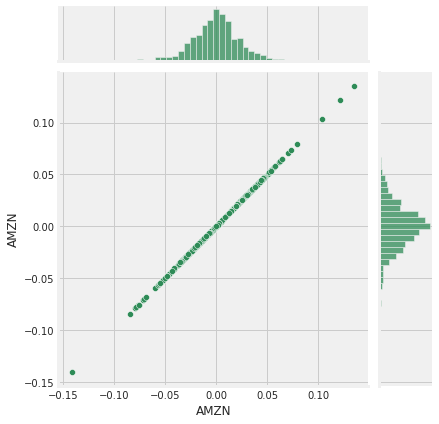

In [ ]:
# Comparing AMAZON to itself
sns.jointplot(x='AMZN', y='AMZN', data=stock_rets, kind='scatter', color='seagreen');

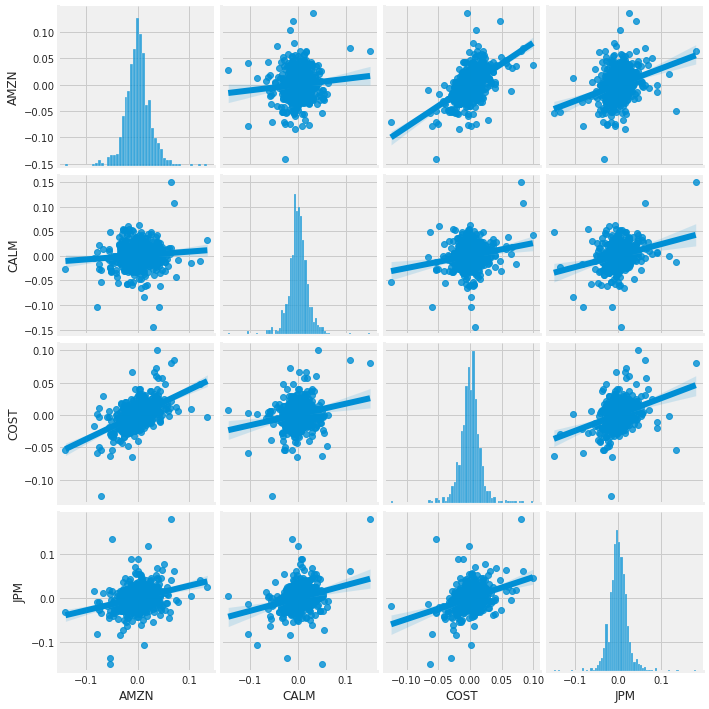

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(stock_rets, kind='reg');

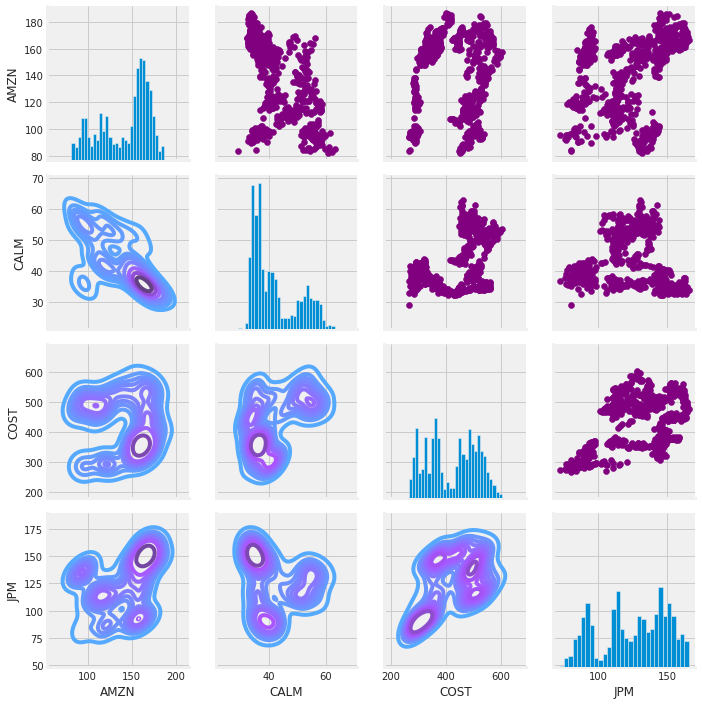

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

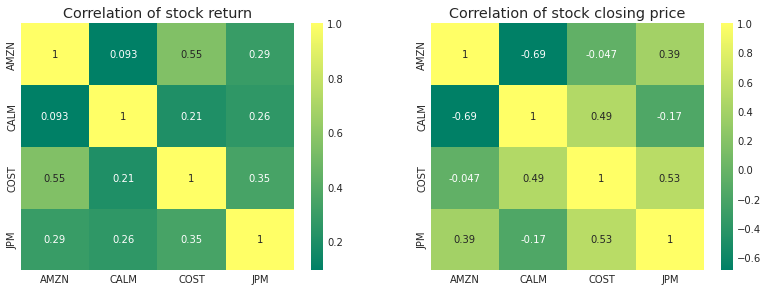

In [ ]:
# Correlation Plot
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

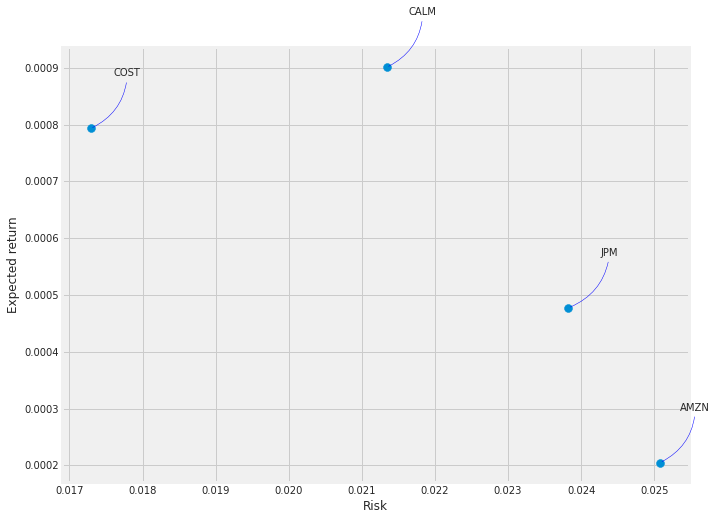

In [ ]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel('Risk')
plt.ylabel('Expected return')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# LSTM Model Prediction

In [4]:
# Predicting the closing price stock price of JPM

# Get the stock quote
df = pdr.get_data_yahoo('JPM', start='2012-01-01', end=datetime.now())
# Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,34.060001,35.189999,34.009998,34.980000,25.548594,44102800
2012-01-04,34.439999,35.150002,34.330002,34.950001,25.710432,36571200
2012-01-05,34.709999,35.919998,34.400002,35.680000,26.247452,38381400
2012-01-06,35.689999,35.770000,35.139999,35.360001,26.012053,33160600
2012-01-09,35.439999,35.680000,34.990002,35.299999,25.967907,23001800


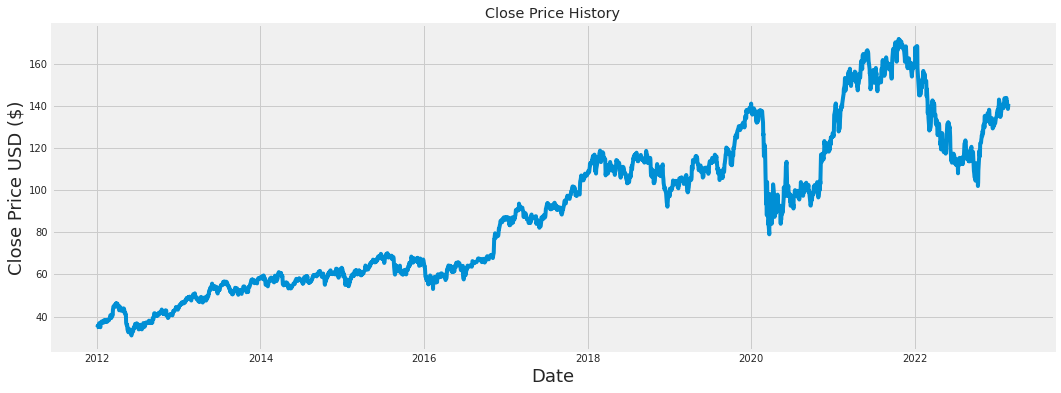

In [5]:
# Simply plot a price history chart
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Adding new variables to df for better performance
#####
# Adding SMA to df
ma_day = [10, 20, 50]

for ma in ma_day:
  column_name = f"SMA{ma}"
  df[column_name] = df['Close'].rolling(ma).mean()

#####
# Adding MACD to the df
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean() # Calculate 12-period EMA
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean() # Calculate 26-period EMA
df['MACD'] = df['EMA12'] - df['EMA26'] # Calculate MACD line
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean() # Calculate signal line
df['Histogram'] = df['MACD'] - df['Signal'] # Calculate histogram

#####
# Calculate the Middle Band (MB)
n = 20 # Set the period for the moving average
df['MB'] = df['Close'].rolling(n).mean()

# Calculate the Standard Deviation (STDEV) and the Upper and Lower Bands
df['STDEV'] = df['Close'].rolling(n).std()
df['UP'] = df['MB'] + 2*df['STDEV']
df['DN'] = df['MB'] - 2*df['STDEV']

#####
# Set the period for the KDJ calculation
n = 9

# Calculate the Lowest Low and Highest High for the past n periods
df['Lowest Low'] = df['Low'].rolling(n).min()
df['Highest High'] = df['High'].rolling(n).max()

# Calculate the Stochastic Oscillator (%K)
df['%K'] = 100*((df['Close'] - df['Lowest Low']) / (df['Highest High'] - df['Lowest Low']))

# Calculate the Simple Moving Average (SMA) of %K for the past m periods
m = 3
df['%K SMA'] = df['%K'].rolling(m).mean()

# Calculate the SMA of %K again to get %D
d = 3
df['%D'] = df['%K SMA'].rolling(d).mean()

# Calculate the J line as 3 times %K minus 2 times %D
df['J'] = 3*df['%K'] - 2*df['%D']

#####
# Set the periods for the BIAS calculation
ma_day = [6, 12, 24]

# Calculate the BIAS for each period
for ma in ma_day:
    column_name = f"SMA{ma}"
    df[column_name] = df['Close'].rolling(ma).mean()
    bias_name = f"BIAS{ma}"
    df[bias_name] = 100*((df['Close'] - df[column_name]) / df[column_name])

#####
# add CCI (Commodity Channel Index)
# Calculate typical price
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3

# Calculate simple moving average of typical price over 14 periods
df['SMA14_TP'] = df['TP'].rolling(window=14).mean()

# Calculate mean deviation over 14 periods
df['MD'] = df['TP'].rolling(window=14).apply(lambda x: np.fabs(x - x.mean()).mean(), raw=True)

# Calculate CCI over 14 periods
df['CCI'] = (df['TP'] - df['SMA14_TP']) / (0.015 * df['MD'])

# Drop intermediate columns
df.drop(columns=['TP', 'SMA14_TP', 'MD'], inplace=True)

#####
# add RSI (Relative Strength Index)
# when RSI > 80, buy side > short side. when RSI < 20, buy side < short side
# when 20 < RSI < 80, normal range
# Calculate price change
delta = df['Close'].diff()

# Define the window for RSI
windows = [6, 12, 24]

# Loop over each window size and calculate RSI
for window in windows:
    # Calculate price change
    delta = df['Close'].diff()

    # Get gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate the rolling average gain and loss
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()

    # Calculate the relative strength
    rs = avg_gain / avg_loss

    # Calculate RSI
    column_name = f'RSI_{window}'
    df[column_name] = 100 - (100 / (1 + rs))

In [7]:
# remove rows with nan values (NaN coming from Moving Average)
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2756 entries, 2012-03-14 to 2023-02-24
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2756 non-null   float64
 1   High          2756 non-null   float64
 2   Low           2756 non-null   float64
 3   Close         2756 non-null   float64
 4   Adj Close     2756 non-null   float64
 5   Volume        2756 non-null   int64  
 6   SMA10         2756 non-null   float64
 7   SMA20         2756 non-null   float64
 8   SMA50         2756 non-null   float64
 9   EMA12         2756 non-null   float64
 10  EMA26         2756 non-null   float64
 11  MACD          2756 non-null   float64
 12  Signal        2756 non-null   float64
 13  Histogram     2756 non-null   float64
 14  MB            2756 non-null   float64
 15  STDEV         2756 non-null   float64
 16  UP            2756 non-null   float64
 17  DN            2756 non-null   float64
 18  Lowest Low

In [9]:
# Set train, validation, and test datasets
train_set = df[:1653].iloc[:,0:35] # 60% of 2756
validation_set = df[1653:1929].iloc[:,0:35] # 70% of 2756
test_set = df[1929:].iloc[:,0:35]
print(len(test_set))

827


In [33]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

train_scaled_data = scaler.fit_transform(train_set)
validation_scaled_data = scaler.fit_transform(validation_set)
test_scaled_data = scaler.fit_transform(test_set)
y_test_scaled_data = scaler.fit_transform(np.array(test_set['Close']).reshape(-1,1))

print(train_scaled_data.shape)
print(validation_scaled_data.shape)
print(test_scaled_data.shape)

(1653, 34)
(276, 34)
(827, 34)


In [11]:
# Create the training data set 
time_stamp = 60

x_train, y_train = [],[]
for i in range(time_stamp, len(train_set)):
    x_train.append(train_scaled_data[i-time_stamp:i])
    y_train.append(train_scaled_data[i,3])
x_train, y_train = np.array(x_train), np.array(y_train)
y_train.shape

(1593,)

In [12]:
x_train.shape

(1593, 60, 34)

In [13]:
# Create the validation data set 
x_valid, y_valid = [], []
for i in range(time_stamp, len(validation_set)):
    x_valid.append(validation_scaled_data[i - time_stamp:i])
    y_valid.append(validation_scaled_data[i, 3])
x_valid, y_valid = np.array(x_valid), np.array(y_valid)
y_valid.shape

(216,)

In [14]:
# Create the test data set 
x_test, y_test = [], []
for i in range(time_stamp, len(test_set)):
    x_test.append(test_scaled_data[i - time_stamp:i])
    y_test.append(test_scaled_data[i, 3])
x_test, y_test = np.array(x_test), np.array(y_test)
y_test.shape

(767,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, activation="softsign",return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
model.add(LSTM(units=64))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(x_valid, y_valid))
m = model.evaluate(x_valid, y_valid)
print(m)

Epoch 1/30
50/50 [==============================] - 14s 209ms/step - loss: 0.0088 - val_loss: 0.0140
Epoch 2/30
50/50 [==============================] - 7s 148ms/step - loss: 6.0783e-04 - val_loss: 0.0134
Epoch 3/30
50/50 [==============================] - 6s 121ms/step - loss: 3.7765e-04 - val_loss: 0.0120
Epoch 4/30
50/50 [==============================] - 7s 148ms/step - loss: 3.0551e-04 - val_loss: 0.0120
Epoch 5/30
50/50 [==============================] - 7s 134ms/step - loss: 3.4502e-04 - val_loss: 0.0111
Epoch 6/30
50/50 [==============================] - 9s 182ms/step - loss: 2.6302e-04 - val_loss: 0.0109
Epoch 7/30
50/50 [==============================] - 6s 124ms/step - loss: 2.2962e-04 - val_loss: 0.0103
Epoch 8/30
50/50 [==============================] - 9s 188ms/step - loss: 2.1674e-04 - val_loss: 0.0085
Epoch 9/30
50/50 [==============================] - 7s 137ms/step - loss: 2.4419e-04 - val_loss: 0.0083
Epoch 10/30
50/50 [==============================] - 7s 135ms/step 

In [17]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

24/24 [==============================] - 2s 43ms/step


In [18]:
# Get the root mean squared error (RMSE)
RMSE = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# MAE, MSE, R^2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Root Mean Squared Error is: {RMSE:.2f}')
print(f'The Mean Absolute Error is: {MAE:.2f}')
print(f'The Mean Squared Error is: {MSE:.2f}'.format(MSE))
print(f'R-squared Score is: {r2*100:.2f} %')

Root Mean Squared Error is: 5.02
The Mean Absolute Error is: 3.65
The Mean Squared Error is: 25.19
R-squared Score is: 95.68 %


<ipython-input-20-b007b7545740>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


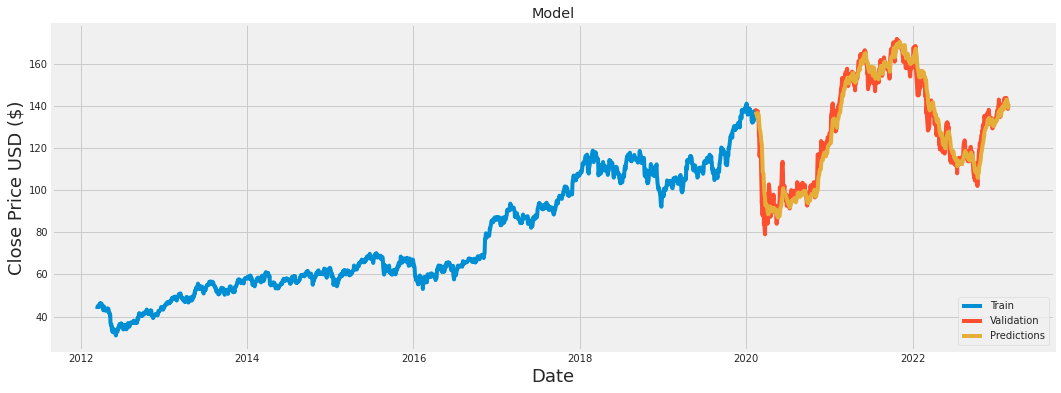

In [20]:
# Plot the data
train = df[:1929+time_stamp]
valid = df[1929+time_stamp:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

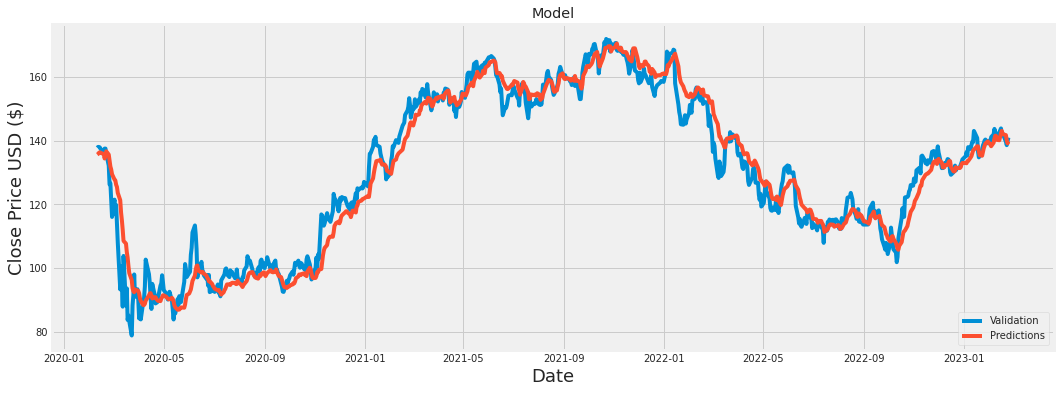

In [21]:
# Visualize the test and predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Validation', 'Predictions'], loc='lower right')
plt.show()

In [31]:
# Short-term prediction stats (20 days)
short_term_predictions = predictions[:20]
short_term_y_test = y_test[:20]
short_term_RMSE = np.sqrt(np.mean(((short_term_predictions - short_term_y_test) ** 2)))
short_term_MAE = mean_absolute_error(short_term_y_test, short_term_predictions)
short_term_MSE = mean_squared_error(short_term_y_test, short_term_predictions)
short_term_r2 = r2_score(short_term_y_test, short_term_predictions)

# Mid-term prediction stats (60 days)
mid_term_predictions = predictions[:60]
mid_term_y_test = y_test[0:60]
mid_term_RMSE = np.sqrt(np.mean(((mid_term_predictions - mid_term_y_test) ** 2)))
mid_term_MAE = mean_absolute_error(mid_term_y_test, mid_term_predictions)
mid_term_MSE = mean_squared_error(mid_term_y_test, mid_term_predictions)
mid_term_r2 = r2_score(mid_term_y_test, mid_term_predictions)

# Long-term prediction stats (250 days)
long_term_predictions = predictions[80:330]
long_term_y_test = y_test[80:330]
long_term_RMSE = np.sqrt(np.mean(((long_term_predictions - long_term_y_test) ** 2)))
long_term_MAE = mean_absolute_error(long_term_y_test, long_term_predictions)
long_term_MSE = mean_squared_error(long_term_y_test, long_term_predictions)
long_term_r2 = r2_score(long_term_y_test, long_term_predictions)

# Put everything into a Pandas DataFrame
stats_df = pd.DataFrame({
    'Time Frame': ['Short-term', 'Mid-term', 'Long-term', 'Model'],
    'RMSE': [short_term_RMSE, mid_term_RMSE, long_term_RMSE, RMSE],
    'MAE': [short_term_MAE, mid_term_MAE, long_term_MAE, MAE],
    'MSE': [short_term_MSE, mid_term_MSE, long_term_MSE, MSE],
    'R-squared': [short_term_r2, mid_term_r2, long_term_r2, r2]
})

print(stats_df)

   Time Frame      RMSE       MAE        MSE  R-squared
0  Short-term  9.334144  6.609964  87.126244   0.412845
1    Mid-term  9.347123  6.679005  87.368707   0.742411
2   Long-term  4.642142  3.552620  21.549481   0.963072
3       Model  5.019030  3.653817  25.190661   0.956825


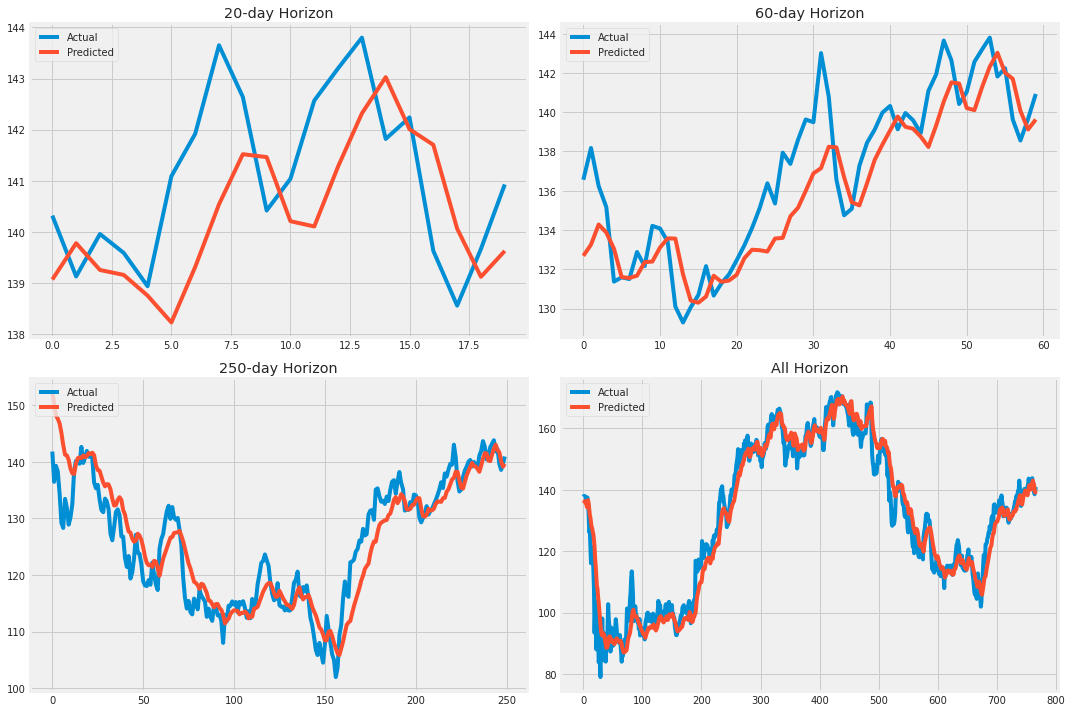

In [32]:
# Define the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the actual vs predicted values for each time horizon
for i, horizon in enumerate([20, 60, 250]):
    ax = axes[i//2][i%2] # Get the appropriate subplot
    y_test_horizon = y_test[-horizon:] # Get the y_test values for the current horizon
    predictions_horizon = predictions[-horizon:] # Get the corresponding predictions
    ax.plot(y_test_horizon) # Plot the actual values
    ax.plot(predictions_horizon) # Plot the predicted values
    ax.legend(['Actual', 'Predicted'], loc='upper left') # Add a legend
    ax.set_title(f'{horizon}-day Horizon') # Add a title

# Add a subplot for the entire predictions and y_test data
ax = axes[1][1]
ax.plot(y_test)
ax.plot(predictions)
ax.legend(['Actual', 'Predicted'], loc='upper left')
ax.set_title('All Horizon')

# Show the plot
plt.tight_layout()
plt.show()